Data set:
https://drive.google.com/open?id=1oPpVV8A_bROfReZCQP2AfgR3zIL_WeiA

(From Kaggle)-- https://www.kaggle.com/gilsousa/habermans-survival-data-set

Description:-
https://drive.google.com/open?id=1ee_Ux01UTqZOGQG4GP_FDDhUKWXj1-PF

Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

### Analyse the above linked dataset as like iris data.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [33]:

data=pd.read_csv("haberman.csv")
data.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [34]:
data.columns=["age","year","nodes","status"]

In [35]:
survived=data[data["status"]==1]
dead=data[data["status"]==2]

In [36]:
print(np.median(dead["nodes"]))
print(np.median(survived["nodes"]))
#results vary widely therefore possible deciding factor for status

4.0
0.0


In [37]:
print(np.median(dead["age"]))
print(np.median(survived["age"]))
#results are close by therefore not deciding factor for status

53.0
52.0


In [38]:
print(np.median(dead["year"]))
print(np.median(survived["year"]))
#results don't vary therefore not deciding factor for status

63.0
63.0


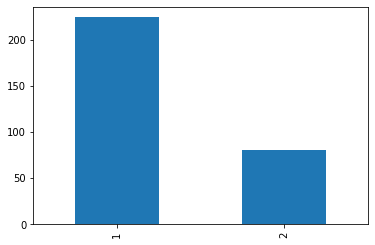

In [39]:
data["status"].value_counts().plot(kind='bar')
plt.show()

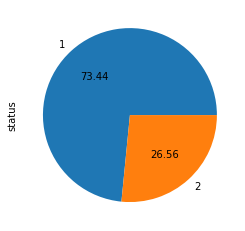

In [40]:
data["status"].value_counts().plot(kind='pie',autopct='%0.2f')
plt.show()

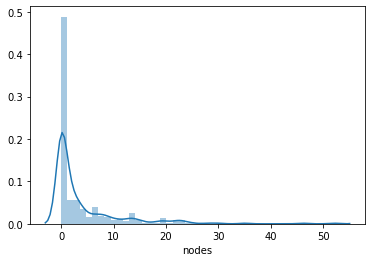

range of nodes= 52


In [41]:
sns.distplot(data["nodes"])
plt.show()
print("range of nodes=",max(data["nodes"])-min(data["nodes"]))

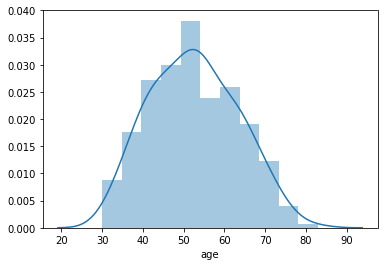

range of age= 53


In [42]:
sns.distplot(data["age"])
plt.show()
print("range of age=",max(data["age"])-min(data["age"]))

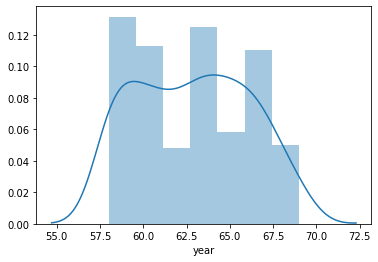

range of year= 11


In [43]:
sns.distplot(data["year"])
plt.show()
print("range of year=",max(data["year"])-min(data["year"]))

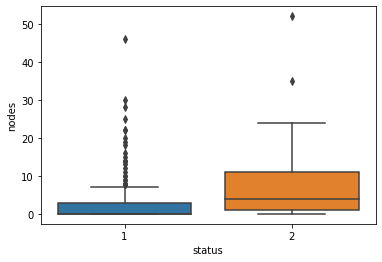

In [44]:
sns.boxplot(x="status",y="nodes",data=data)
plt.show()

Q1-- Plot Histogram for all fearutes of the data set and write comments on which feature is best for predicting survival status.

(Hint: Use same process as did in iris data set.)

In [45]:
#Write your code here for ploting--

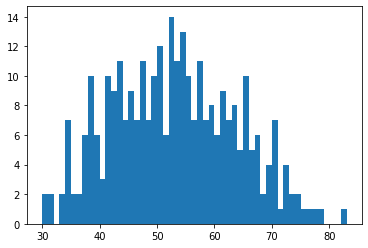

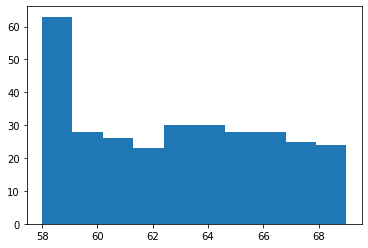

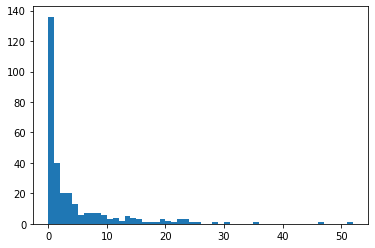

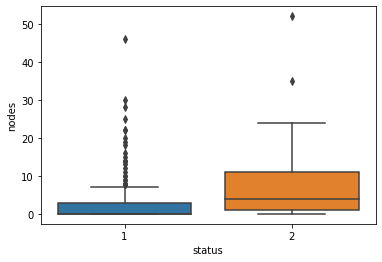

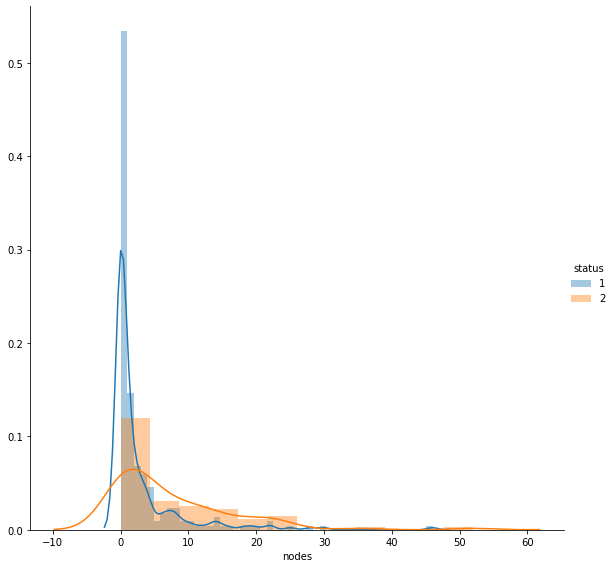

In [48]:
plt.hist(data["age"].values, bins=range(min(data["age"]), max(data["age"])+1, 1))
plt.show()
plt.hist(data["year"].values)
plt.show()
plt.hist(data["nodes"].values, bins=range(min(data["nodes"]), max(data["nodes"])+1, 1))
plt.show()
sns.boxplot(x="status",y="nodes",data=data)
plt.show()
sns.FacetGrid(data, hue="status",height=8).map(sns.distplot,"nodes").add_legend()
plt.show()

In [47]:
# Write your comments here--
# As we can see from the box plot and the distplots, people survive only when there is less number of nodes (probability
#density of nodes for status 1 is more positively skewed than that for status 2). In the box plot too,
#a greater number of observations are found for status 2 as we increase the number of nodes as compared to status 1,
#rest are outliers. As number of nodes increase, the plot is covered by the box of the people with survival status=2

Q2-- On the ipl wala dataset create a function which will accept a batsman name and 1 interger value and returns the number of runs he has after those many matches

E.g Input (V Kohli, 18)

Output - 678(Runs scored by Virat Kohli after 18 matches

In [29]:
# Give your comments here
def runs_in_matches(batsman,number):
    deliveries=pd.read_csv("deliveries.csv")
    data=deliveries.groupby("batsman").get_group(batsman)
    if number>len(data):
        print("number of matches ever played by",batsman,"is only",len(data),"!")
    else:
        print(batsman,"scored",data.groupby("match_id")["batsman_runs"].sum()[:number].sum(),"runs in",number,"matches")
runs_in_matches("DA Warner",2353421)
runs_in_matches("DA Warner",23)

number of matches ever played by DA Warner is only 3398 !
DA Warner scored 867 runs in 23 matches


Q3: Write a function which will plot the match wise scores of two batsman in the form of a PDF, check this [image](https://drive.google.com/open?id=18y9DiuVvNZ3p5LIBv-eaDVxNtXrI7hp9)
<img src=""/>

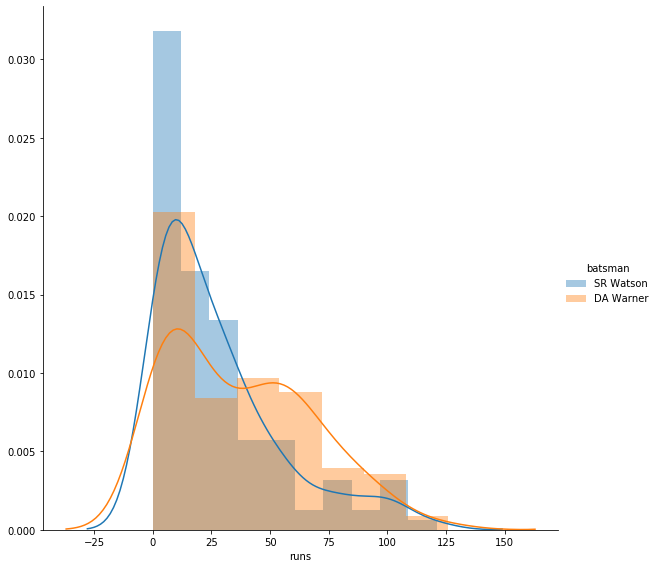

In [30]:
def compare_batsmen(bat1,bat2):
    deliveries=pd.read_csv("deliveries.csv")
    group=deliveries.groupby("batsman")
    data1=group.get_group(bat1).groupby("match_id")["batsman_runs"].sum()
    data1=data1.reset_index()
    data1[bat1]=[bat1]*len(data1)
    data1=data1.drop("match_id",1)
    data1.columns=["runs","batsman"]
    data2=group.get_group(bat2).groupby("match_id")["batsman_runs"].sum()
    data2=data2.reset_index()
    data2[bat2]=[bat2]*len(data2)
    data2=data2.drop("match_id",1)
    data2.columns=["runs","batsman"]
    data=data1.append(data2)
    sns.FacetGrid(data, hue="batsman",size=8).map(sns.distplot,"runs").add_legend()
    plt.show()

compare_batsmen("SR Watson","DA Warner")

Q3-- Write a function which will take a list as input and in return plot PDF and CDF curve as like in IRIS one.

     (you have to write your on logic for np.cumsum()--(cummulative sum- function) )

In [31]:
# Write your code here--
def cumulative_sum(values):
    cumulative=[values[0]]
    if len(values)>1:
        for i in values[1:]:
            cumulative.append(cumulative[-1]+i)
    return cumulative

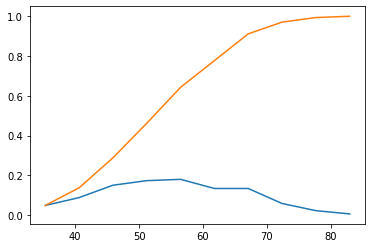

In [32]:
def pdf_cdf(values):
    counts, edges=np.histogram(values, bins=10)
    pdf=counts/sum(counts)
    cdf=cumulative_sum(pdf)
    plt.plot(edges[1:],pdf)
    plt.plot(edges[1:],cdf)
    plt.show()

value=pd.read_csv("haberman.csv")
pdf_cdf(value.iloc[:,0])